# Exploración de datos

## Descripción de los datos

#### BASES BICIMAD

Datos de las bases del servicio público de bicicleta eléctrica de la ciudad de Madrid.


Ultima actualización de los datos: 27/08/2018


* **Número**: Número de identificación de la estación
* **Gis_X**: Longitud en el sistema de coordenadas EPSG23030 (UTM 30N)
* **Gis_Y**: Latitud en el sistema de coordenadas EPSG23030 (UTM 30N)
* **Fecha de Alta**: Fecha de alta de la estación
* **Distrito**: Distrito de Madrid en el que se situa
* **Barrio**: Barrio de Madrid en el que se sitúa
* **Calle**: Calle en la que se sitúa
* **Nº Finca**: Número de calle
* **Tipo de Reserva**: Tipo de reserva al que pertenece
* **Número de Plazas**: Numero máximo de puestos de carga y aparcamiento de la estación
* **LONGITUD**: Longitud en el sistema de coordenadas EPSG4326 (WGS84)
* **LATITUD**: Latitud en el sistema de coordenadas EPSG4326 (WGS84)
* **DIRECCION**: Dirección completa


#### BIKE DATA

Datos de uso de septiembre de 2018

* **id**: id del trayecto
* **user_day_code**: Código del usuario. Para una misma fecha, todos los movimientos de un  mismo  usuario,  tendrán  el  mismo  código,  con  el  fin  de  poder  realizar  estudios estadísticos de las tendencias diarias de los usuarios.
* **idunplug_station**: Número de la estación de la que se desengancha la bicicleta. 
*  **idunplug_base**: Número de la base de la que se desengancha la bicicleta. 
* **idplug_station**: Número de la estación en la que se engancha la bicicleta. 
* **idplug_base**: Número de la base en la que se engancha la bicicleta.
* **unplug_hourTime**: Franja horaria en la que se realiza el desenganche de la bicicleta. Por  cuestiones  de  anonimato,  se  facilita  la  hora  de  inicio del  movimiento,  sin  la información  de  minutos  y  segundos.  Todos  los  movimientos  iniciados  durante  la misma hora, tendrán el mismo dato de inicio. 
* **travel_time**:  Tiempo  total  en  segundos,  entre  el  desenganche  y  el  enganche  de  la bicicleta.
* **user_type**: Número que indica el tipo de usuario que ha realizado el movimiento. Sus posibles valores son: 
    - 0: No se ha podido determinar el tipo de usuario 
    - 1: Usuario anual (poseedor de un pase anual) 
    - 2: Usuario ocasional 
    - 3: Trabajador de la empresa
* **ageRange**:  Número  que  indica  el  rango  de  edad  del  usuario  que  ha  realizado  el movimiento. Sus posibles valores son: 
    - 0: No se ha podido determinar el rango de edad del usuario 
    - 1: El usuario tiene entre 0 y 16 años 
    - 2: El usuario tiene entre 17 y 18 años 
    - 3: El usuario tiene entre 19 y 26 años 
    - 4: El usuario tiene entre 27 y 40 años 
    - 5: El usuario tiene entre 41 y 65 años 
    - 6: El usuario tiene 66 años o más
* **zip_code**: Texto que indica el código postal del usuario que ha realizado el movimiento.  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# relative paths
PATH_BASES = '../../data/raw/bases_bicimad.csv'
PATH_BIKES = '../../data/raw/bike_data.csv'

In [4]:
df_bases = pd.read_csv(PATH_BASES, encoding = "ISO-8859-1", delimiter=';')
df_bikes = pd.read_csv(PATH_BIKES, delimiter=',')

### 2. Análisis de los trayectos en BiciMad

In [25]:
print('Número de trayectos en el dataset: {}'.format(df_bikes.shape[0]))

Número de trayectos en el dataset: 398040


In [26]:
df_bikes.head()

,id,user_day_code,idplug_base,idunplug_base,idplug_station,idunplug_station,user_type,travel_time,ageRange,unplug_hourTime,zip_code
0,5b9058462f38434ab0d85cd3,ead1db07fa526e19fe237115d5516fbdc5acb99057b885...,5,17,16,40,1,263,0,2018-09-01T01:00:00.000+0200,NaN
1,5b9058462f38434ab0d85ce9,420d9e220bd8816681162e15e9afcb1c69c5a756090728...,12,26,52,85,1,382,2,2018-09-01T01:00:00.000+0200,28009
2,5b9058462f38434ab0d85ced,780f5c8157efe8e6dca44dbd689817d4b126364fca917f...,1,11,58,109,1,305,4,2018-09-01T01:00:00.000+0200,28004
3,5b9058462f38434ab0d85cee,a225ab7b4b74954cd9fbe8cc2ec63390cd04e92cdd1a2f...,1,1,120,168,1,262,4,2018-09-01T01:00:00.000+0200,28015
4,5b9058462f38434ab0d85cef,867f38545733bc5f0c69d2592d228e01b3a39daa143e8b...,19,8,80,89,1,310,4,2018-09-01T01:00:00.000+0200,28007


Tipos de las columnas:

In [27]:
df_bikes.dtypes

id                  object
user_day_code       object
idplug_base          int64
idunplug_base        int64
idplug_station       int64
idunplug_station     int64
user_type            int64
travel_time          int64
ageRange             int64
unplug_hourTime     object
zip_code            object
dtype: object

In [28]:
df_bikes['idplug_base'] = df_bikes['idplug_base'].apply(str)
df_bikes['idunplug_base'] = df_bikes['idunplug_base'].apply(str)
df_bikes['idplug_station'] = df_bikes['idplug_station'].apply(str)
df_bikes['idunplug_station'] = df_bikes['idunplug_station'].apply(str)
df_bikes['user_type']   = df_bikes['user_type'].apply(str)
df_bikes['ageRange']   = df_bikes['ageRange'].apply(str)

In [29]:
df_bikes.dtypes

id                  object
user_day_code       object
idplug_base         object
idunplug_base       object
idplug_station      object
idunplug_station    object
user_type           object
travel_time          int64
ageRange            object
unplug_hourTime     object
zip_code            object
dtype: object

In [160]:
df_bikes['id'].duplicated().unique() # No hay ids duplicados

array([False])

In [166]:
len(df_bikes['user_day_code'].unique())

219444

In [179]:
df_bikes.groupby(['user_day_code'], as_index=False).count()

,user_day_code,id,idplug_base,idunplug_base,idplug_station,idunplug_station,user_type,travel_time,ageRange,unplug_hourTime,zip_code
0,00005508f0af82d32e29aa27f87f8017fba34e8efd56af...,2,2,2,2,2,2,2,2,2,0
1,000089ed4778ce2550649e17f0c10adf28bf38158d97c6...,1,1,1,1,1,1,1,1,1,1
2,00009e1e5207ed7eed1339fe70f9d9d5fec8df67652504...,3,3,3,3,3,3,3,3,3,0
3,00009e8347603a09a6c3fda13388787aec690fd5882565...,2,2,2,2,2,2,2,2,2,0
4,0000ab4ce8b17a0a63fdffc9a1e4f28937be4740cd49c7...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
219439,fffea5bc12e2b14833b457a6ca81ea201b6b84dabd9d0b...,1,1,1,1,1,1,1,1,1,0
219440,fffeb3dd18e4cf056d483cbdc276876d1dd6cd6fd33134...,1,1,1,1,1,1,1,1,1,1
219441,fffee04d3b131458f2d4160d35196dd127cc10aa3643ef...,1,1,1,1,1,1,1,1,1,1
219442,ffff716ae5686e952274156b8e95fd83fa25963fc3d627...,2,2,2,2,2,2,2,2,2,0


#### 1.2.1 ¿Cuánto tiempo duran los viajes?

In [30]:
df_bikes['travel_time'] = df_bikes['travel_time']/60 # minutes
df_bikes['travel_time'].describe()

count    398040.000000
mean         17.730740
std          60.266696
min           0.016667
25%           7.916667
50%          11.983333
75%          18.133333
max       22443.050000
Name: travel_time, dtype: float64

Cada viaje dura de media 17 minutos. La desviación típica es muy elevada, lo que indica presencia de valores extremos (el valor máximo de duración de un viaje son 22443 minutos, 15 días, por lo que probablemente sea un error, un robo o una labor de mantenimiento). Analicemos los valores extremos:

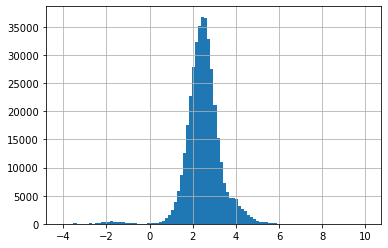

In [31]:
np.log(df_bikes['travel_time']).hist(bins=100)

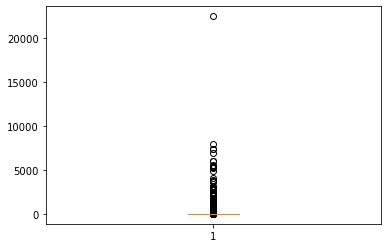

In [42]:
dict_result = plt.boxplot(df_bikes['travel_time'])

Hay valores tan extremos que no alcanzamos a ver la caja que engloba los puntos en el rango intercuartílico (IQR). 

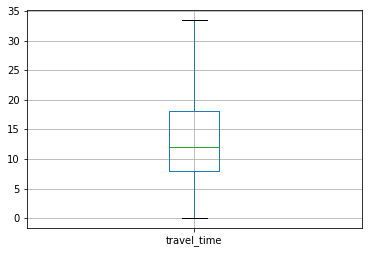

In [80]:
df_bikes.boxplot('travel_time', sym='') # plot without fliers, default whis=1.5

Método 1 para eliminar outliers: Eliminar valores fuera del rango [Q1 - 1.5IQR, Q3 + 1.5IQR]:
[TODO] Detectar outliers con otros métodos - DBSCAN,...

In [77]:
Método 1 para eliminar outliers: Eliminar valores fuera del rango [Q1 - 1.5IQR, Q3 + 1.5IQR]:
[TODO] Detectar outliers con otros métodos - DBSCAN,...
Q1 = df_bikes['travel_time'].quantile(0.25)
Q3 = df_bikes['travel_time'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print("Lower limit: {}".format(lower_limit))
print("Upper limit: {}".format(upper_limit))
print("% of outliers (values ouside of [Q1 - 1.5IQR, Q3 + 1.5IQR]: {}".format(df_bikes[df_bikes['travel_time'] > upper_limit].shape[0]/df_bikes.shape[0]*100))

Lower limit: -7.4083333333333306
Upper limit: 33.45833333333333


% of outliers (values ouside of [Q1 - 1.5IQR, Q3 + 1.5IQR]: 8.513717214350317


Outliers:
- Por encima de Q3+1.5IQR --> Eliminar
- Por debajo de Q1-1.5IQR --> no hay, la distribución es un poco skewed. 

Viajes demasiado cortos: Chequeo de cómo de cerca estaban las estaciones de origen y destino

In [84]:
# too short rides
print("% of outliers (values ouside of [Q1 - 1.5IQR, Q3 + 1.5IQR]: {}".format(df_bikes[df_bikes['travel_time'] < 2.5].shape[0]/df_bikes.shape[0]*100))

% of outliers (values ouside of [Q1 - 1.5IQR, Q3 + 1.5IQR]: 1.6490804944226711


In [86]:
df_short_rides = df_bikes[df_bikes['travel_time'] <= 2.5]

In [89]:
df_short_rides

,id,user_day_code,idplug_base,idunplug_base,idplug_station,idunplug_station,user_type,travel_time,ageRange,unplug_hourTime,zip_code
58,5b9058472f38434ab0d85d52,2d46e658d5eb4cef08583263ba5a25d4a5123d9aebfdba...,22,26,42,43,1,1.783333,0,2018-09-01T01:00:00.000+0200,NaN
127,5b9058482f38434ab0d85dae,a1c70162729dabd15c7200e31b7107d318329494497e1b...,14,19,107,101,1,1.116667,0,2018-09-01T01:00:00.000+0200,NaN
239,5b9058482f38434ab0d85e2f,e38f82ea46ddb4c7857440e5b7538a7ab6bf5907c21c7f...,27,3,21,20,1,2.316667,5,2018-09-01T01:00:00.000+0200,28014
244,5b9058482f38434ab0d85e32,d561370a123abdac783e04dab423fcf95ee3e525147f2f...,12,24,16,14,1,1.933333,0,2018-09-01T01:00:00.000+0200,NaN
299,5b9058492f38434ab0d85e83,563d9ae6d8d46d71849c4be747b8ba0570e9a129f4c5ef...,3,13,133,52,1,2.450000,4,2018-09-01T01:00:00.000+0200,28019
...,...,...,...,...,...,...,...,...,...,...,...
397776,5bb3f1112f38430d780004dd,8e89ae0bc4bb6d546103420b23ad121ef09a65bd606a19...,1,23,108,92,1,2.283333,4,2018-09-28T07:00:00.000+0200,NaN
397824,5bb3f1112f38430d78000463,0e8cbf6f689daf45dcdd8f093734a6bccc92109f7790dc...,3,3,91,91,3,0.233333,5,2018-09-28T08:00:00.000+0200,NaN
397853,5bb3f1112f38430d780004f5,5335820ae36edccacdb387fb34f8d12a47f175a54fad68...,18,3,152,148,1,1.783333,2,2018-09-28T08:00:00.000+0200,28002
397943,5bb3f1122f38430d7800057d,6f4daaa8973b40f718eadcad4fbe2a3e8801e0f7074ae1...,19,10,94,114,1,2.483333,4,2018-09-28T08:00:00.000+0200,28028


In [92]:
a = df_short_rides['idunplug_station'] - df_short_rides['idplug_station']

In [99]:
df_short_rides

,id,user_day_code,idplug_base,idunplug_base,idplug_station,idunplug_station,user_type,travel_time,ageRange,unplug_hourTime,zip_code,station_distance
58,5b9058472f38434ab0d85d52,2d46e658d5eb4cef08583263ba5a25d4a5123d9aebfdba...,22,26,42,43,1,1.783333,0,2018-09-01T01:00:00.000+0200,NaN,1
127,5b9058482f38434ab0d85dae,a1c70162729dabd15c7200e31b7107d318329494497e1b...,14,19,107,101,1,1.116667,0,2018-09-01T01:00:00.000+0200,NaN,-6
239,5b9058482f38434ab0d85e2f,e38f82ea46ddb4c7857440e5b7538a7ab6bf5907c21c7f...,27,3,21,20,1,2.316667,5,2018-09-01T01:00:00.000+0200,28014,-1
244,5b9058482f38434ab0d85e32,d561370a123abdac783e04dab423fcf95ee3e525147f2f...,12,24,16,14,1,1.933333,0,2018-09-01T01:00:00.000+0200,NaN,-2
299,5b9058492f38434ab0d85e83,563d9ae6d8d46d71849c4be747b8ba0570e9a129f4c5ef...,3,13,133,52,1,2.450000,4,2018-09-01T01:00:00.000+0200,28019,-81
...,...,...,...,...,...,...,...,...,...,...,...,...
397776,5bb3f1112f38430d780004dd,8e89ae0bc4bb6d546103420b23ad121ef09a65bd606a19...,1,23,108,92,1,2.283333,4,2018-09-28T07:00:00.000+0200,NaN,-16
397824,5bb3f1112f38430d78000463,0e8cbf6f689daf45dcdd8f093734a6bccc92109f7790dc...,3,3,91,91,3,0.233333,5,2018-09-28T08:00:00.000+0200,NaN,0
397853,5bb3f1112f38430d780004f5,5335820ae36edccacdb387fb34f8d12a47f175a54fad68...,18,3,152,148,1,1.783333,2,2018-09-28T08:00:00.000+0200,28002,-4
397943,5bb3f1122f38430d7800057d,6f4daaa8973b40f718eadcad4fbe2a3e8801e0f7074ae1...,19,10,94,114,1,2.483333,4,2018-09-28T08:00:00.000+0200,28028,20


In [98]:
df_short_rides[df_short_rides['idunplug_station'] == df_short_rides['idplug_station']]

,id,user_day_code,idplug_base,idunplug_base,idplug_station,idunplug_station,user_type,travel_time,ageRange,unplug_hourTime,zip_code,station_distance
786,5b90584c2f38434ab0d86099,7d8e3a28f61f7d1ac179cccd02c632f276d4832c579de0...,11,11,127,127,3,0.150000,1,2018-09-01T02:00:00.000+0200,NaN,0
994,5b90584d2f38434ab0d86121,fc87f185d68c40120482f970b20a3ccccfbaf6f5cf7737...,21,21,175,175,3,0.100000,4,2018-09-01T03:00:00.000+0200,NaN,0
1015,5b90584d2f38434ab0d8616e,6b73fba7594b52f910338d9c6a4c9b208128bf3a6cf746...,14,14,107,107,3,2.250000,5,2018-09-01T03:00:00.000+0200,NaN,0
1396,5b90584f2f38434ab0d86334,6b73fba7594b52f910338d9c6a4c9b208128bf3a6cf746...,14,14,79,79,3,0.150000,5,2018-09-01T04:00:00.000+0200,NaN,0
1810,5b9058512f38434ab0d86507,3be6f9f3208eec63340bff538cbb1f326d40fd9314fe4b...,19,19,171,171,3,0.200000,5,2018-09-01T06:00:00.000+0200,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
396391,5bb3f10c2f38430d78fffecb,cbe3dbbccb3a1c8a684c95de037e9fc0bc503776c1a0a8...,8,8,79,79,3,0.216667,5,2018-09-28T01:00:00.000+0200,NaN,0
396657,5bb3f10d2f38430d78ffffd1,ae72c35e7ef3c72f33c8e619d5b1d1e04ec4fc8746b579...,8,8,156,156,3,0.216667,5,2018-09-28T02:00:00.000+0200,NaN,0
396688,5bb3f10d2f38430d78000007,ae72c35e7ef3c72f33c8e619d5b1d1e04ec4fc8746b579...,22,19,61,61,3,0.183333,5,2018-09-28T02:00:00.000+0200,NaN,0
397120,5bb3f10e2f38430d780001e2,e3898c900418329359a4a9f15c522fe3f176a7c6ff78ed...,22,22,138,138,3,0.300000,0,2018-09-28T06:00:00.000+0200,NaN,0


In [101]:
df_short_rides[df_short_rides['user_type'] == 3]

,id,user_day_code,idplug_base,idunplug_base,idplug_station,idunplug_station,user_type,travel_time,ageRange,unplug_hourTime,zip_code,station_distance
786,5b90584c2f38434ab0d86099,7d8e3a28f61f7d1ac179cccd02c632f276d4832c579de0...,11,11,127,127,3,0.150000,1,2018-09-01T02:00:00.000+0200,NaN,0
994,5b90584d2f38434ab0d86121,fc87f185d68c40120482f970b20a3ccccfbaf6f5cf7737...,21,21,175,175,3,0.100000,4,2018-09-01T03:00:00.000+0200,NaN,0
1015,5b90584d2f38434ab0d8616e,6b73fba7594b52f910338d9c6a4c9b208128bf3a6cf746...,14,14,107,107,3,2.250000,5,2018-09-01T03:00:00.000+0200,NaN,0
1396,5b90584f2f38434ab0d86334,6b73fba7594b52f910338d9c6a4c9b208128bf3a6cf746...,14,14,79,79,3,0.150000,5,2018-09-01T04:00:00.000+0200,NaN,0
1630,5b9058512f38434ab0d86442,6b73fba7594b52f910338d9c6a4c9b208128bf3a6cf746...,17,11,111,112,3,0.483333,5,2018-09-01T05:00:00.000+0200,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
396391,5bb3f10c2f38430d78fffecb,cbe3dbbccb3a1c8a684c95de037e9fc0bc503776c1a0a8...,8,8,79,79,3,0.216667,5,2018-09-28T01:00:00.000+0200,NaN,0
396657,5bb3f10d2f38430d78ffffd1,ae72c35e7ef3c72f33c8e619d5b1d1e04ec4fc8746b579...,8,8,156,156,3,0.216667,5,2018-09-28T02:00:00.000+0200,NaN,0
396688,5bb3f10d2f38430d78000007,ae72c35e7ef3c72f33c8e619d5b1d1e04ec4fc8746b579...,22,19,61,61,3,0.183333,5,2018-09-28T02:00:00.000+0200,NaN,0
397120,5bb3f10e2f38430d780001e2,e3898c900418329359a4a9f15c522fe3f176a7c6ff78ed...,22,22,138,138,3,0.300000,0,2018-09-28T06:00:00.000+0200,NaN,0


[TODO] Algoritmos de detección de outliers

- Análisis de los tipos de usuarios
    - Buscar estaciones con más y menos usuarios registrados, detectar áreas turistas
    - Duración de viajes por tipo de usuario
    - Duración de viajes por edad de usuario
- Análisis del rango de edad
- Análisis del código postal ([FUTURO] alimentar con población de dicho código postal, estudiar códigos postales donde haya más usuarios "fieles")
- Análisis de las duraciones de los viajes: (1) eliminar outliers superiores y estudiar su posible origen (error? mantenimiento? --devolución misma estación--, robo?), (2) eliminar viajes demasiado cortos  (<2.5 minutos) y estudiar su posible origen (devolución misma estación? --> ¿bici defectuosa?)
- Análisis del número de viajes de un usuario, tipos de usuarios (heavy users, hacerles un análisis especial --> No se puede, no hay ids de usuarios)
- Análisis de los días que se cogen bicis:
    - División entre días entre semana y días de fin de semana (+ festivos)
    - División horaria (horas populares, horas populares por estación)
    - División verano - invierno
    - [FUTURO] Alimentar con datos metereológicos
    - Reestructurar el dataset para tener key [day, station] y datos [bicis cogidas, bicis libres, ...] para hacer el modelo predictivo
- Análisis de los caminos
    - Heavy Stations
    - Momentos críticos de estaciones en los que no haya habido bicis libres


### Tipos de usuarios

In [118]:
df_bikes

,id,user_day_code,idplug_base,idunplug_base,idplug_station,idunplug_station,user_type,travel_time,ageRange,unplug_hourTime,zip_code
0,5b9058462f38434ab0d85cd3,ead1db07fa526e19fe237115d5516fbdc5acb99057b885...,5,17,16,40,1,4.383333,0,2018-09-01T01:00:00.000+0200,NaN
1,5b9058462f38434ab0d85ce9,420d9e220bd8816681162e15e9afcb1c69c5a756090728...,12,26,52,85,1,6.366667,2,2018-09-01T01:00:00.000+0200,28009
2,5b9058462f38434ab0d85ced,780f5c8157efe8e6dca44dbd689817d4b126364fca917f...,1,11,58,109,1,5.083333,4,2018-09-01T01:00:00.000+0200,28004
3,5b9058462f38434ab0d85cee,a225ab7b4b74954cd9fbe8cc2ec63390cd04e92cdd1a2f...,1,1,120,168,1,4.366667,4,2018-09-01T01:00:00.000+0200,28015
4,5b9058462f38434ab0d85cef,867f38545733bc5f0c69d2592d228e01b3a39daa143e8b...,19,8,80,89,1,5.166667,4,2018-09-01T01:00:00.000+0200,28007
...,...,...,...,...,...,...,...,...,...,...,...
398035,5bb3f1122f38430d780005ec,0543138a1925d67c06cde2e697950be87a33c8f093f522...,24,5,19,161,1,8.750000,5,2018-09-28T08:00:00.000+0200,28003
398036,5bb3f1122f38430d780005ed,f1268f405525ec0cbc9d82cd094cf824f0ae03ee4bae1b...,14,2,84,135,1,12.450000,5,2018-09-28T08:00:00.000+0200,28045
398037,5bb3f1122f38430d780005ee,0c26f5985ebad9e09e541e9a1f192b518d6d627740934f...,10,3,1,31,1,4.766667,0,2018-09-28T08:00:00.000+0200,NaN
398038,5bb3f1122f38430d780005ef,7e7ea3a999d7b2562bcfa073350fae5cb3063694407a5f...,11,1,169,149,1,9.233333,0,2018-09-28T08:00:00.000+0200,NaN


In [120]:
df_bikes.describe()

,idplug_base,idunplug_base,idplug_station,idunplug_station,user_type,travel_time,ageRange
count,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000,398040.000000
mean,12.018847,12.002226,91.081999,91.202872,1.128952,17.730740,2.452982
std,7.661486,7.647833,51.540760,51.550800,0.489199,60.266696,2.146160
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.016667,0.000000
25%,5.000000,5.000000,49.000000,49.000000,1.000000,7.916667,0.000000
50%,11.000000,11.000000,90.000000,90.000000,1.000000,11.983333,4.000000
75%,19.000000,19.000000,135.000000,135.000000,1.000000,18.133333,4.000000
max,30.000000,30.000000,175.000000,175.000000,3.000000,22443.050000,6.000000


In [121]:
df_bikes_filt = df_bikes[df_bikes['travel_time'] < upper_limit]
df_bikes_filt = df_bikes_filt[df_bikes_filt['travel_time'] > 2.5]

In [122]:
df_bikes_filt.shape

(357517, 11)

In [123]:
df_bikes_filt.groupby('user_type')['travel_time'].describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
0,1033.0,15.872572,7.864061,2.700000,9.250000,14.600000,21.750000,33.450000
1,344586.0,12.361853,6.158587,2.516667,7.700000,11.183333,15.816667,33.450000
2,3299.0,16.478615,7.854876,2.583333,10.008333,15.333333,22.308333,33.416667
3,8599.0,21.371801,7.533652,2.516667,15.958333,22.066667,27.600000,33.450000


- Usuarios anuales (poseedores de pases anuales): La mayoría de los usuarios.

Viajes al día:

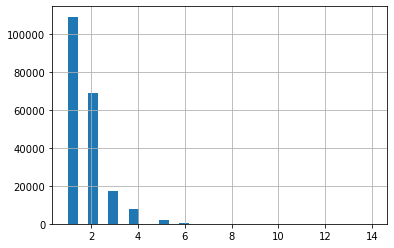

In [131]:
df_bikes_filt[df_bikes_filt['user_type'] == 1].groupby('user_day_code').count()['id'].hist(bins=30)

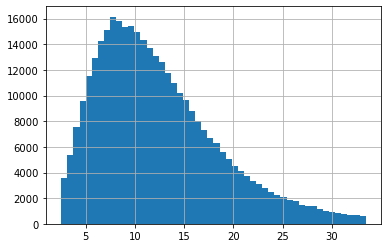

In [136]:
(df_bikes_filt[df_bikes_filt['user_type'] == 1]['travel_time']).hist(bins=50)
#TODO skewed distribution

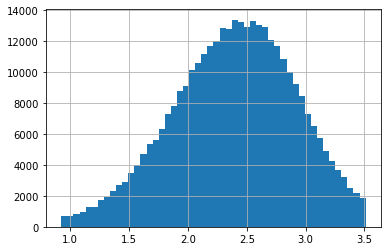

In [134]:
#Distribución de duración de viajes
np.log(df_bikes_filt[df_bikes_filt['user_type'] == 1]['travel_time']).hist(bins=50)

In [142]:
df_bikes_filt[df_bikes_filt['user_type'] == 1].groupby('zip_code').count()

#TODO limpieza de zip_code

,id,user_day_code,idplug_base,idunplug_base,idplug_station,idunplug_station,user_type,travel_time,ageRange,unplug_hourTime
zip_code,,,,,,,,,,
,13,13,13,13,13,13,13,13,13,13
2800,12,12,12,12,12,12,12,12,12,12
00000,7,7,7,7,7,7,7,7,7,7
000000,4,4,4,4,4,4,4,4,4,4
00135,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...
CODIGO_POSTAL_NOT_DEF,118,118,118,118,118,118,118,118,118,118
aroncs830@gmail.com,2,2,2,2,2,2,2,2,2,2
fgu@ie.edu,1,1,1,1,1,1,1,1,1,1


In [144]:
df_bikes.groupby('user_type')['travel_time'].describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
0,1624.0,33.482512,32.453456,1.616667,11.920833,22.833333,44.383333,326.583333
1,367114.0,15.355964,18.171830,0.083333,7.816667,11.566667,16.900000,359.833333
2,5652.0,41.228940,41.569816,1.216667,13.700000,26.441667,53.570833,359.100000
3,23650.0,47.896515,233.182391,0.016667,15.583333,31.550000,53.183333,22443.050000


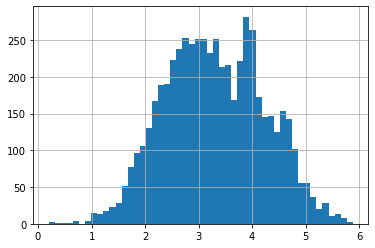

In [148]:
np.log(df_bikes[df_bikes['user_type'] == 2]['travel_time']).hist(bins=50)

In [155]:
# stolen bikes?
df_bikes['idunplug_station'].unique().max()
# faltan estaciones 173, 174, 175?

175

#### Fechas

Solo disponemos de data del mes de septiembre

In [161]:
df_bikes_date['datetime_unplug'] = pd.to_datetime(df_bikes['unplug_hourTime'])

In [271]:
# aux function to transform numeric day of week to string
def day_of_week_to_string(day):
    switcher = {
        0: 'Mon',
        1: 'Tue',
        2: 'Wed',
        3: 'Thu',
        4: 'Fri',
        5: 'Sat',
        6: 'Sun',       
    }
    return switcher.get(day)

In [269]:
df_bikes_date['day_of_week'] = df_bikes_date['datetime_unplug'].dt.dayofweek.map(day_of_week_to_string)
df_bikes_date['hour'] = df_bikes_date['datetime_unplug'].dt.hour
df_bikes_date['month'] = df_bikes_date['datetime_unplug'].dt.month
df_bikes_date['day'] = df_bikes_date['datetime_unplug'].dt.day

In [289]:
df_bikes_date.groupby(['day', 'day_of_week', 'month'], as_index=False).count().reset_index()

,index,day,day_of_week,month,id,user_day_code,idplug_base,idunplug_base,idplug_station,idunplug_station,user_type,travel_time,ageRange,unplug_hourTime,zip_code,datetime_unplug,hour
0,0,1,Sat,9,9762,9762,9762,9762,9762,9762,9762,9762,9762,9762,4705,9762,9762
1,1,2,Sun,9,9882,9882,9882,9882,9882,9882,9882,9882,9882,9882,4584,9882,9882
2,2,3,Mon,9,14631,14631,14631,14631,14631,14631,14631,14631,14631,14631,7965,14631,14631
3,3,4,Tue,9,15957,15957,15957,15957,15957,15957,15957,15957,15957,15957,8687,15957,15957
4,4,5,Wed,9,16058,16058,16058,16058,16058,16058,16058,16058,16058,16058,8891,16058,16058
5,5,6,Thu,9,16249,16249,16249,16249,16249,16249,16249,16249,16249,16249,8993,16249,16249
6,6,7,Fri,9,14339,14339,14339,14339,14339,14339,14339,14339,14339,14339,7682,14339,14339
7,7,8,Sat,9,9081,9081,9081,9081,9081,9081,9081,9081,9081,9081,4351,9081,9081
8,8,9,Sun,9,10755,10755,10755,10755,10755,10755,10755,10755,10755,10755,5059,10755,10755
9,9,10,Mon,9,15508,15508,15508,15508,15508,15508,15508,15508,15508,15508,8520,15508,15508


In [196]:
import seaborn as sns

#### Day of week

In [280]:
df_bikes_date

,id,user_day_code,idplug_base,idunplug_base,idplug_station,idunplug_station,user_type,travel_time,ageRange,unplug_hourTime,zip_code,datetime_unplug,day_of_week,hour,month,day
0,5b9058462f38434ab0d85cd3,ead1db07fa526e19fe237115d5516fbdc5acb99057b885...,5,17,16,40,1,4.383333,0,2018-09-01T01:00:00.000+0200,NaN,2018-09-01 01:00:00+02:00,Sat,1,9,1
1,5b9058462f38434ab0d85ce9,420d9e220bd8816681162e15e9afcb1c69c5a756090728...,12,26,52,85,1,6.366667,2,2018-09-01T01:00:00.000+0200,28009,2018-09-01 01:00:00+02:00,Sat,1,9,1
2,5b9058462f38434ab0d85ced,780f5c8157efe8e6dca44dbd689817d4b126364fca917f...,1,11,58,109,1,5.083333,4,2018-09-01T01:00:00.000+0200,28004,2018-09-01 01:00:00+02:00,Sat,1,9,1
3,5b9058462f38434ab0d85cee,a225ab7b4b74954cd9fbe8cc2ec63390cd04e92cdd1a2f...,1,1,120,168,1,4.366667,4,2018-09-01T01:00:00.000+0200,28015,2018-09-01 01:00:00+02:00,Sat,1,9,1
4,5b9058462f38434ab0d85cef,867f38545733bc5f0c69d2592d228e01b3a39daa143e8b...,19,8,80,89,1,5.166667,4,2018-09-01T01:00:00.000+0200,28007,2018-09-01 01:00:00+02:00,Sat,1,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398035,5bb3f1122f38430d780005ec,0543138a1925d67c06cde2e697950be87a33c8f093f522...,24,5,19,161,1,8.750000,5,2018-09-28T08:00:00.000+0200,28003,2018-09-28 08:00:00+02:00,Fri,8,9,28
398036,5bb3f1122f38430d780005ed,f1268f405525ec0cbc9d82cd094cf824f0ae03ee4bae1b...,14,2,84,135,1,12.450000,5,2018-09-28T08:00:00.000+0200,28045,2018-09-28 08:00:00+02:00,Fri,8,9,28
398037,5bb3f1122f38430d780005ee,0c26f5985ebad9e09e541e9a1f192b518d6d627740934f...,10,3,1,31,1,4.766667,0,2018-09-28T08:00:00.000+0200,NaN,2018-09-28 08:00:00+02:00,Fri,8,9,28
398038,5bb3f1122f38430d780005ef,7e7ea3a999d7b2562bcfa073350fae5cb3063694407a5f...,11,1,169,149,1,9.233333,0,2018-09-28T08:00:00.000+0200,NaN,2018-09-28 08:00:00+02:00,Fri,8,9,28


In [278]:
bikes_per_day = df_bikes_date.groupby('day_of_week', sort=False, as_index=False).mean()

In [279]:
bikes_per_day

,day_of_week,idplug_base,idunplug_base,idplug_station,idunplug_station,user_type,travel_time,ageRange,hour,month,day
0,Sat,11.942320,11.918617,88.590765,88.098152,1.146439,19.184680,2.201034,13.151912,9.0,12.351764
1,Sun,11.901168,11.878582,89.370665,87.678637,1.125297,20.538681,2.139578,13.224859,9.0,13.003536
2,Mon,12.050671,12.055628,91.618453,92.607324,1.129311,17.121471,2.530932,14.136484,9.0,13.645864
3,Tue,12.063947,12.049078,91.752450,91.924492,1.117068,16.882279,2.542570,14.252833,9.0,14.595722
4,Wed,12.024151,12.004342,91.886714,92.143246,1.136329,16.842990,2.543564,14.140641,9.0,15.534640
5,Thu,12.056369,12.050052,91.715656,92.185591,1.124095,17.322502,2.531887,14.142958,9.0,16.625204
6,Fri,12.032155,11.988522,91.263638,91.721884,1.128919,17.607510,2.504579,12.994041,9.0,14.993281


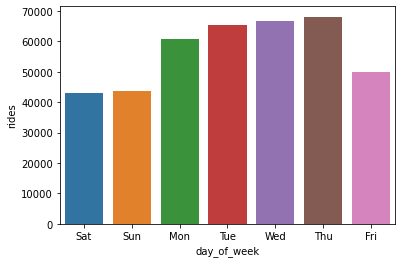

In [274]:
bikes_per_day = df_bikes_date.groupby('day_of_week', sort=False, as_index=False).size().reset_index(name='rides')
sns.barplot(bikes_per_day['day_of_week'], bikes_per_day['rides'])

#### Hour per day of week

In [260]:
bikes_per_hour = df_bikes_date.groupby(['day_of_week', 'hour'], sort=False, as_index=False).size().reset_index(name='rides')

/home/irene/anaconda3/envs/keepler-bicimad-env/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


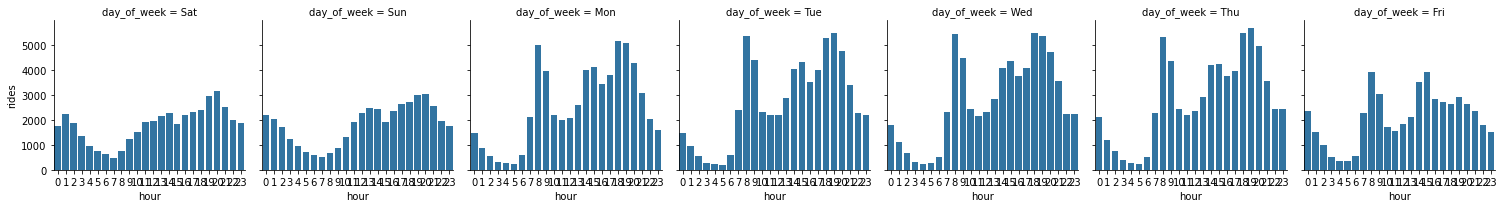

In [262]:
g = sns.FacetGrid(bikes_per_hour, col='day_of_week')
g.map(sns.barplot, 'hour', 'rides')